In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_digits, load_iris, make_blobs

## Classification vs. Regression

- **Regression**: Problem setting where we are predicting a *continuous* target
- **Classification**: Problem setting where we are predicting a *categorical* target

In [2]:
#synthetic dataset
X, y = make_blobs( centers = 2, random_state=22)

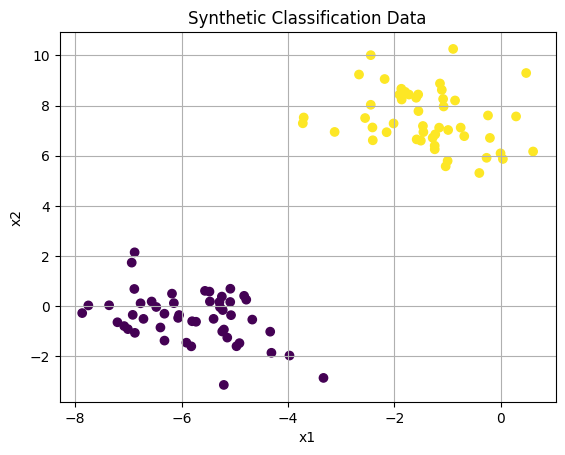

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic Classification Data');

**PROBLEM**: Can you determine an equation of a line that separates the purple class from the yellow class?

In [4]:
#answer in slack -- equation of line


### Our Motivating Example



In [5]:
default = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/Default.csv', index_col = 0)

In [6]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [7]:
default.head(2)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


### Visualizing Default by Continuous Features

In [8]:
#scatterplot of balance vs. income colored by default status

<Axes: xlabel='balance', ylabel='income'>

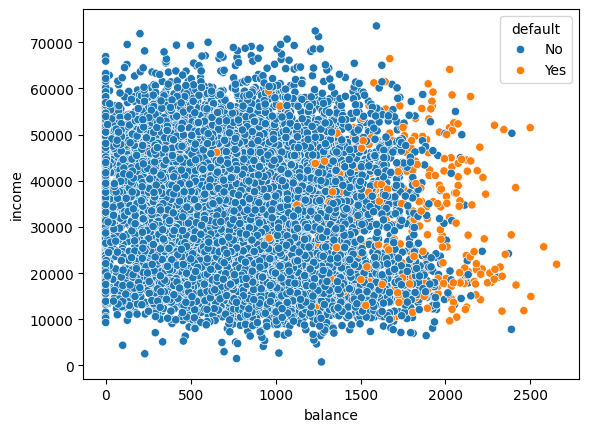

In [9]:
sns.scatterplot(data = default, x = 'balance', y = 'income', hue = 'default')

<Axes: xlabel='default', ylabel='income'>

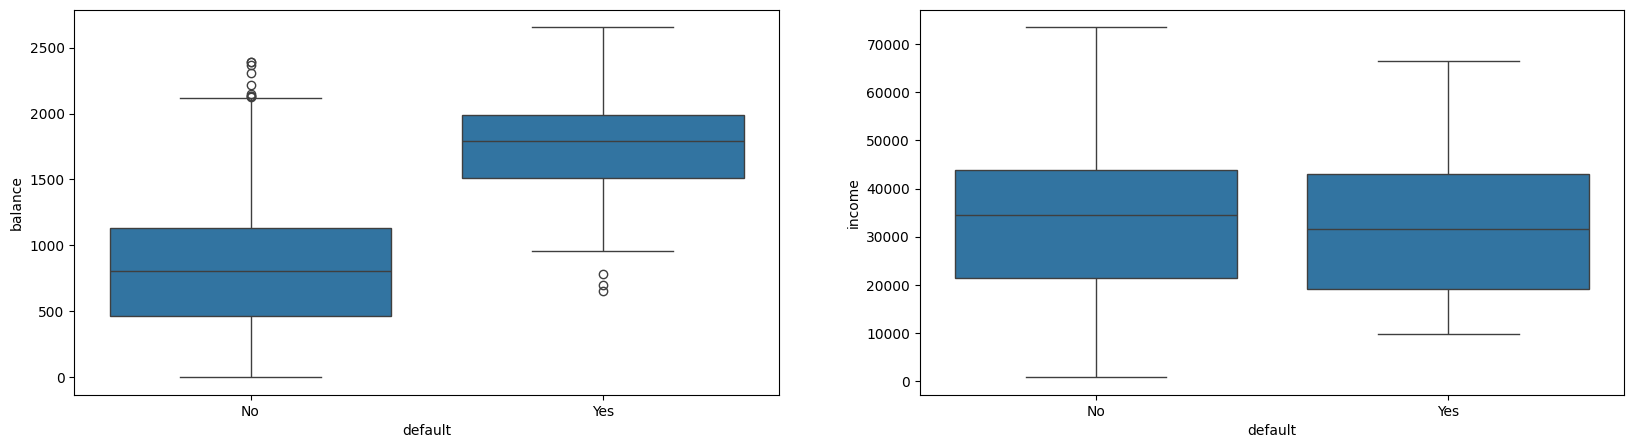

In [10]:
#boxplots for balance and income by default
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.boxplot(data = default, x = 'default', y = 'balance', ax = ax[0])
sns.boxplot(data = default, x = 'default', y = 'income', ax = ax[1])

### Considering only `balance` as the predictor



In [11]:
#create binary default column
default['binary_default'] = np.where(default['default'] == 'No', 0, 1)

<Axes: xlabel='balance', ylabel='binary_default'>

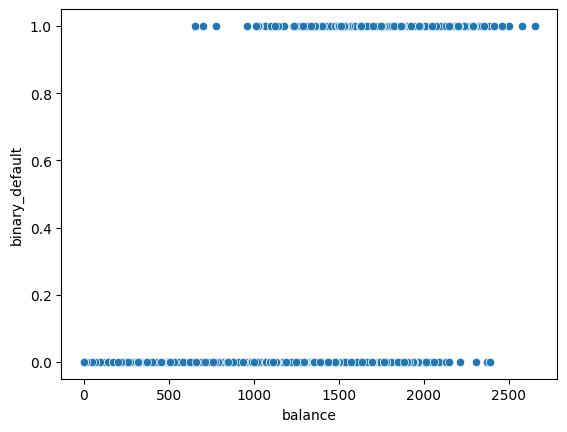

In [12]:
#scatter of Balance vs Default
sns.scatterplot(data = default, x = 'balance', y = 'binary_default')

##### PROBLEM

1. Build a `LinearRegression` model with balance as the predictor.
2. Predict the default for balances: `[200, 1000, 1500, 2000, 2500, 3500]`.  Do these make sense?

In [13]:
X = default[['balance']]
y = default['binary_default']

In [14]:
#instantiate and fit the model


In [15]:
new_X = np.array([200, 1000, 1500, 2000, 2500, 3500])

In [16]:
predictions = ''

<Axes: xlabel='balance', ylabel='binary_default'>

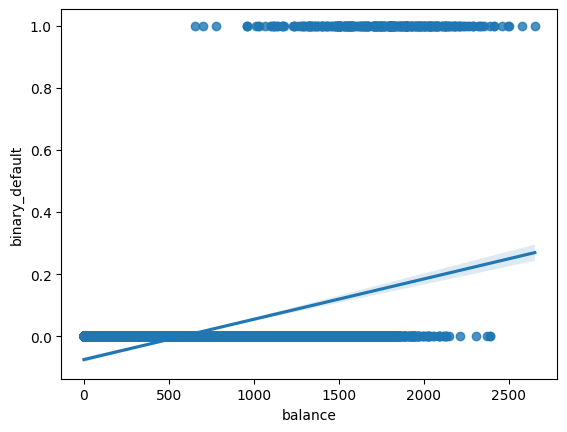

In [17]:
#regplot
sns.regplot(x = X, y = y)

### The Sigmoid aka Logistic Function


$$y = \frac{1}{1 + e^{-x}}$$

In [18]:
#define the logistic
def logistic(x): return 1/(1 + np.exp(-x))

In [19]:
#domain
x = np.arange(-10, 10, .1)

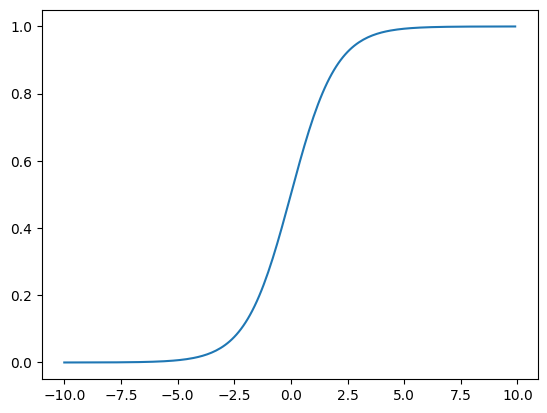

In [20]:
#plot it
plt.plot(x, logistic(x))

### Usage should seem familiar

Fit a `LogisticRegression` estimator from `sklearn` on the features:

```python 
X = default[['balance']]
y = default['binary_default']
```

In [21]:
#instantiate
clf = LogisticRegression()

In [22]:
#define X and y
X = default[['balance']]
y = default['default']

In [23]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [24]:
#fit on the train
clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
#examine train and test scores
print(f'Train Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

Train Score: 0.9728
Test Score: 0.9712


### Evaluating the Classifier

In `scikitlearn` the primary default evalution metric is **accuracy** or percent correct.  We still need to compare this to our baseline -- typically predicting the most frequently occurring class.  Further, you can investigate the mistakes made with each class by looking at the **Confusion Matrix**.  A quick visualization of this is had using the `ConfusionMatrixDisplay`.

In [26]:
#baseline -- most frequently occurring class
y_train.value_counts(normalize = True)

default
No     0.966533
Yes    0.033467
Name: proportion, dtype: float64

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

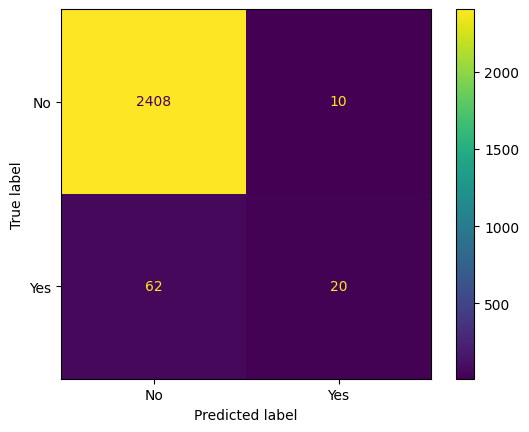

In [28]:
#from estimator
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

### Similarities to our earlier work

In [29]:
#there is a coefficient
clf.coef_

array([[0.00556055]])

In [30]:
#there is an intercept
clf.intercept_

array([-10.76105259])

### Where was the line?

The version of the logistic we have just developed is actually:

$$ y = \frac{e^{ax + b}}{1 + e^{ax + b}} $$

Its output represents probabilities of being labeled the positive class in our example.  This means that we can interpret the output of the above function using our parameters, remembering that we used the `balance` feature to predict `default`.

In [31]:
def predictor(x):
    line = clf.coef_[0]*x + clf.intercept_
    return np.e**line/(1 + np.e**line)

In [32]:
#predict 1000
predictor(1000)

array([0.00548355])

In [33]:
#predict 2000
predictor(2000)

array([0.58905082])

In [34]:
#estimator has this too
clf.predict_proba(np.array([[1000]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.99451645, 0.00548355]])

In [35]:
clf.predict(np.array([[1000]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

### Using Categorical Features

In [36]:
default.head(2)

,default,student,balance,income,binary_default
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0


In [37]:
default['student_binary'] = np.where(default.student == 'No', 0, 1)

In [38]:
X = default[['student_binary']]

In [39]:
#instantiate and fit
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [40]:
#performance
clf.score(X, y)

0.9667

In [41]:
#coefficients
clf.coef_

array([[0.39620888]])

In [42]:
#compare probabilities
clf.predict_proba(X)

array([[0.97076088, 0.02923912],
       [0.95715448, 0.04284552],
       [0.97076088, 0.02923912],
       ...,
       [0.97076088, 0.02923912],
       [0.97076088, 0.02923912],
       [0.95715448, 0.04284552]])

### Using Multiple Features



In [43]:
default.columns

Index(['default', 'student', 'balance', 'income', 'binary_default',
       'student_binary'],
      dtype='object')

In [44]:
features = ['balance', 'income', 'student_binary']
X = default.loc[:, features]
y = default['binary_default']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [46]:
clf = LogisticRegression().fit(X_train, y_train)

In [47]:
clf.score(X_train, y_train)

0.974

In [48]:
clf.score(X_test, y_test)

0.9712

**Predictions**:

- student: yes
- balance: 1,500 dollars
- income: 40,000 dollars

In [49]:
ex1 = np.array([[1500, 40_000, 1]])
#predict probability
clf.predict_proba(ex1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.94507158, 0.05492842]])

- student: no
- balance: 1,500 dollars
- income: 40,000 dollars

In [50]:
ex2 = np.array([[1500, 40_000, 0]])
#predict probability
clf.predict_proba(ex2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.89705189, 0.10294811]])

### This is similar to our multicollinearity in regression; we will call it confounding

<center>
<img src = 'https://github.com/jfkoehler/nyu_bootcamp_fa24/blob/main/images/default_confound.png?raw=true' />
</center>

#### Using `scikitlearn` and its `Pipeline`

From the original data, to build a model involved:

1. One hot or dummy encoding the categorical feature.
2. Standard Scaling the continuous features
3. Building Logistic model

we can accomplish this all with the `Pipeline`, where the first step is a `make_column_transformer` and the second is a `LogisticRegression`.  

In [51]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [52]:
X_train, X_test, y_train, y_test = train_test_split(default[['student', 'income', 'balance']], default['default'],
                                                   random_state = 22)

In [53]:
# create OneHotEncoder instance


In [54]:
# create StandardScaler instance


In [55]:
# make column transformer -- one hot encode student, scale remainder
# transformer = make_column_transformer((), remainder = '')

In [56]:
# logistic regressor


In [57]:
# pipeline
pipe = Pipeline([(), ()])

In [58]:
# fit it


In [59]:
# score on train and test
print(f'Train Score: {pipe.score(X_train, y_train)}')
print(f'Test Score: {pipe.score(X_test, y_test)}')

AttributeError: This 'Pipeline' has no attribute 'score'

In [ ]:
pipe.named_steps['model'].coef_

#### Problem

Below, a dataset on bank customer churn is loaded and displayed.  Your objective is to predict `Exited` or not.  Use `CreditScore`, `Gender`, `Age`, `Tenure`, and `Balance` as predictors.  Examine the confusion matrix display.  Was your classifier better at predicting exits or non-exits?

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
bank_churn = fetch_openml(data_id = 43390).frame

In [ ]:
bank_churn.head()

In [ ]:
#create train/test split -- random_state = 42
X = bank_churn[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance']]
y = bank_churn['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [ ]:
ohe = OneHotEncoder(drop = 'first')
sscaler = StandardScaler()

In [ ]:
#encode gender and standard scale other features


In [ ]:
#set up pipeline to encode/scale and then build logistic regression model


In [ ]:
#fit the model on training data


In [ ]:
#score on test and train


In [ ]:
#compare to baseline


In [ ]:
#confusion matrix with test data


#### Compare to KNN and Grid Searching

Let's compare how this estimator performs compared to the `KNeighborsClassifier`.  This time however, we will be trying many KNN models across different numbers of neighbors.  One way we could do this is with a loop; something like:

```python
for neighbor in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors = neighbor).fit(X_train, y_train)
```



Instead, we can use the `GridSearchCV` object from sklearn.  This will take an estimator and a dictionary with parameters to be searched over.  

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters we want to try
params = {'n_neighbors': range(1, 30, 2)}

In [ ]:
# estimator with parameters


In [ ]:
# grid search object


In [ ]:
# fit it
X = default[['student_binary', 'income', 'balance']]
y = default['default']


In [ ]:
# what was best?


In [ ]:
# score it 


#### Comparing Results

A good way to think about classifier performance is using a **confusion matrix**.  Below, we visualize this using the `ConfusionMatrixDisplay.from_estimator`. 

![](https://www.sharpsightlabs.com/wp-content/uploads/2023/09/sklearn-confusion-matrix_visual-example.png)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# a single confusion matrix
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=['No', 'Yes'])

In [ ]:
# compare knn and logistic
fig, ax = plt.subplots(1, 2, figsize = (19, 5))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, display_labels=['no', 'yes'], ax = ax[0])
ax[0].set_title('Logistic')
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, display_labels=['no', 'yes'], ax = ax[1])
ax[1].set_title('KNN')

#### Activity: Stock Market Data

This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, `Lag1` through `Lag5`. We have also recorded `Volume` (the number of shares traded on the previous day, in billions), `Today` (the percentage return on the date in question) and `Direction` (whether the market was Up or Down on this date). Our goal is to predict `Direction` (a qualitative response) using the other features.

In [ ]:
stocks = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/refs/heads/master/Notebooks/Data/Smarket.csv', index_col=0)

In [ ]:
stocks.head()

1. Predict `Direction` using `Lag1` through `Lag5` and `Volume` using a logistic regression model.

2. Predict `Direction` using only `Lag1` and `Lag2` as predictors.  Is this model better or worse than your first model?

3. As we don't have any test data to evaluate our estimator with, create a test set of just observations from 2005.  Fit your model on the training data and compare the train vs test performance.

4. Is this a model that you would feel comfortable using to trade with?  Why or why not?

5. Compare a KNN model performance on the test set that you have grid searched.  Is this model better or worse than your logistic regression model?  Why?

#### Practice

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer(as_frame=True).frame

In [ ]:
cancer.head(3)

In [108]:
cancer['target'] = np.where(cancer['target'] == 0, 1, 0) #ONLY RUN ONCE!  RELOAD DATA IF YOU RUN TWICE.

In [ ]:
# use all features


In [ ]:
# train/test split -- random_state = 22


In [ ]:
# pipeline to scale then logistic regressor


In [ ]:
# fit logreg pipeline


In [ ]:
# examine confusion matrix on test data


In [ ]:
# do you care about one mistake more than the other here?? Which kind?

**EXIT TICKET**

Examine the discussion from Wikipedia's page on [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall).  Use the confusion matrices above to compute the precision and recall of your KNN and Logistic Models.  Answer the questions linked in the form [here](https://docs.google.com/forms/d/e/1FAIpQLSes81-ynE-JkGcltSb09MW9SfvZbh3hL3hh7FDT5yI2RChwXg/viewform?usp=sharing).